# 300_Oscars_Analysis


## Purpose

In this notebook we will analise the data we have gathered. We will explore what are the affects that oscar wins and nominations have on movies. We will also break down how oscar movies score and gross and see can we find any trends or groupings.

## Datasets

 - Input: oscarMovies.pkl
 - Output: n/a

In [117]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from scipy import stats
%matplotlib inline

In [118]:
oscarMovies = pd.read_pickle('oscarMovies.pkl')

In [119]:
oscarMovies

,HarMean,Oscar_wins,budget,director,gross,grossRank,name,score,scoreRank,star,year,Oscar_noms
0,0.884794,0,8000000.0,Rob Reiner,52287414.0,5495.0,Stand by Me,8.1,6685.0,Wil Wheaton,1986,0
1,0.901333,0,6000000.0,John Hughes,70136369.0,5878.0,Ferris Bueller's Day Off,7.8,6436.5,Matthew Broderick,1986,0
2,0.801096,0,15000000.0,Tony Scott,179800601.0,6613.0,Top Gun,6.9,4651.5,Tom Cruise,1986,0
3,0.941311,0,18500000.0,James Cameron,85160248.0,6095.0,Aliens,8.4,6775.0,Sigourney Weaver,1986,1
4,0.630507,0,9000000.0,Randal Kleiser,18564613.0,3996.0,Flight of the Navigator,6.9,4651.5,Joey Cramer,1986,0
5,0.636565,0,25000000.0,Jim Henson,12729917.0,3468.0,Labyrinth,7.4,5798.5,David Bowie,1986,0
6,0.607958,0,6000000.0,David Lynch,8551228.0,3057.0,Blue Velvet,7.8,6436.5,Isabella Rossellini,1986,1
7,0.696145,0,9000000.0,Howard Deutch,40471663.0,5140.0,Pretty in Pink,6.8,4408.5,Molly Ringwald,1986,0
8,0.810375,0,15000000.0,David Cronenberg,40456565.0,5139.0,The Fly,7.5,5973.0,Jeff Goldblum,1986,0
9,0.678447,0,8800000.0,Peter Faiman,174635000.0,6600.0,Crocodile Dundee,6.5,3560.5,Paul Hogan,1986,0


# Analysis

In [124]:
oscarMovies.groupby('Oscar_noms').size()#groups the different values in oscar noms column and counts them

Oscar_noms
0    6385
1     233
2      84
3      22
4       7
dtype: int64

In [125]:
oscarMovies.groupby('Oscar_wins').size()

Oscar_wins
0    6629
1      82
2      17
3       3
dtype: int64

We first compared the movies that had one oscars to those that had not. We used the count we had created before to examine the effect that multiple wins had on a movies success. We can see that having a single oscar compared to having no Oscars was a significant advantage in terms of a movies success. What was more interesting was the fact that that having two oscars gave the greatest boost to a movies success than even having three oscars did. 

Text(0.5,0,'Number of Oscar Winners')

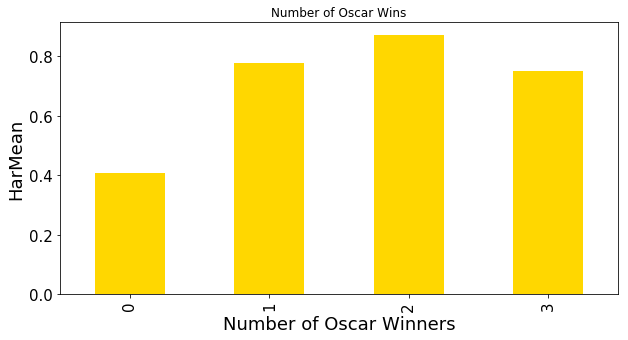

In [126]:
oscarMovies.groupby('Oscar_wins')['HarMean'].mean().plot.bar(title ='Number of Oscar Wins',color='gold',fontsize=15,figsize=(10,5))
plt.ylabel('HarMean',size=18)
plt.xlabel('Number of Oscar Winners',size=18)

As we can see there was a similar effect in terms of oscar nominations and movie success. We see the greatest increase in harmonic mean for movies that have enev a single nomination that that of movies without any nominations. However what was differnet to oscar winning movies was the fact that the more nominations a movie recieved the greater the harmonic mean score was for those movies.

Text(0.5,0,'Number of Oscar nominations')

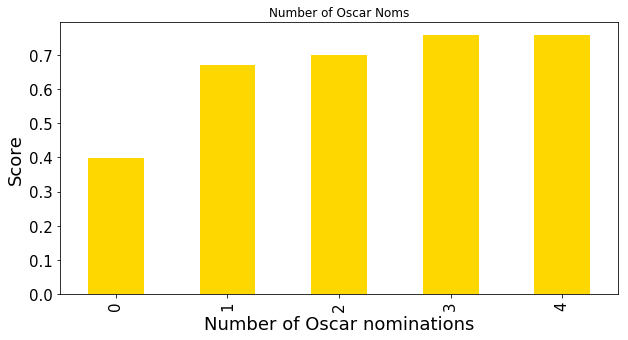

In [127]:
oscarMovies.groupby('Oscar_noms')['HarMean'].mean().plot.bar(title='Number of Oscar Noms',color='gold',figsize=(10,5),fontsize=15)
plt.ylabel('Score',size=18)
plt.xlabel('Number of Oscar nominations',size=18)

We examined the break dwon of an oscar winning movies average score and overall gross next. Initially we looked at all movies but we soon found that it was too difficult to try and work out any meaningful insights into the data. The graphs were saturated we too much information and so we took steps to improve the visualisations.

Text(0,0.5,'Score')

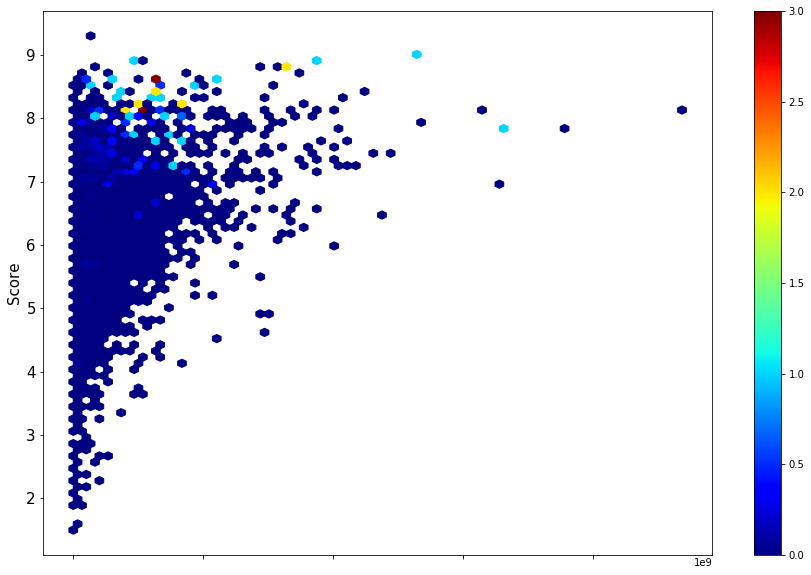

In [128]:
oscarMovies.plot.hexbin('gross', 'score', C='Oscar_wins',gridsize=70, colormap='jet',figsize=(15,10),legend=True,fontsize=15,use_index=True)
plt.ylabel('Score',size=15)
#plt.xlabel('Gross',size=15)

Text(0,0.5,'Score')

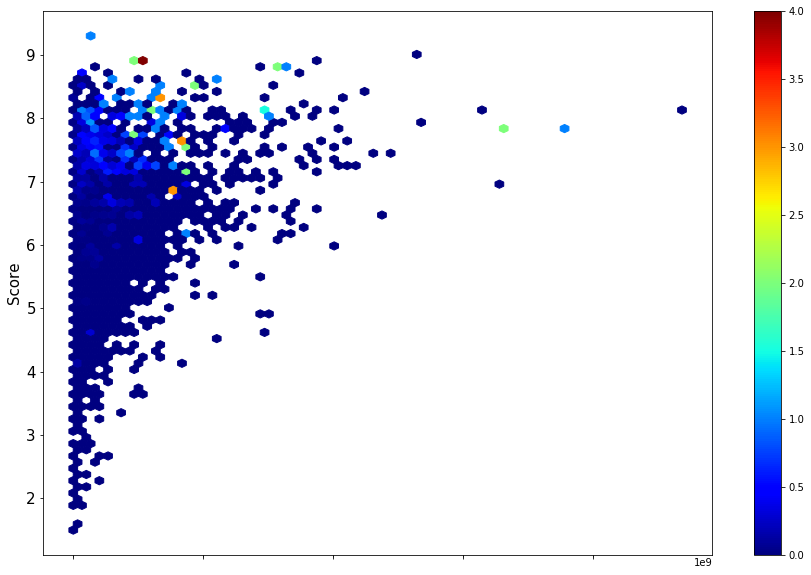

In [129]:
oscarMovies.plot.hexbin('gross', 'score', C='Oscar_noms',gridsize=70, colormap='jet',figsize=(15,10),legend=True,fontsize=15,use_index=True)
plt.ylabel('Score',size=15)
#plt.xlabel('Gross',size=15)

The first attempt we made was to try and see how the gross of oscar winning movies compared to that of non wining/nominated movies. By removing the outliers we were able to better visualise the distribution of data points across the hexbin.

In [130]:
wins = oscarMovies[(oscarMovies['gross']<=350000000)]#removes movies that grosses above 350,000,000 million.
noms = oscarMovies[(oscarMovies['gross']<=350000000)]

With the outliers removed we can see that the distribution of movies along the groos is quite even across ocsar nominated movies and non oscar nominated movies. We do see that that top 5 grossing movies none of them have an oscar nomination. While we do see a grouping nearer  to the lower end of the gross it seems to match up with the non oscar nominated movies as the majority of them gross at the lower end as well.

Text(0.5,0,'Gross(where 1 is 100 million)')

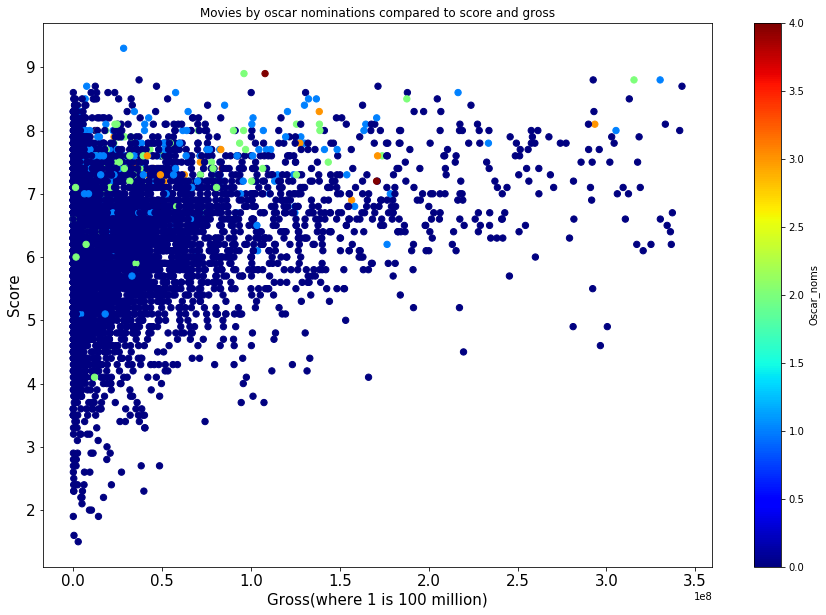

In [157]:
noms.plot.scatter('gross', 'score', c='Oscar_noms',s=40, colormap='jet',sharex=False, figsize=(15,10),title='Movies by oscar nominations compared to score and gross',legend=True,fontsize=15,use_index=True,rot=0)
plt.ylabel('Score',size=15)
plt.xlabel('Gross(where 1 is 100 million)',size=15)

when we look at oscar winning movies in the same way we see a very similar result. The distribution of the films does not seem to be overly effected by an oscar win. Oscar winning movies are dispresed more widely across the graph than movies with oscar nomination but that could simply be down to the fact that there are less of them.

Text(0.5,0,'Gross(where 1 is 100 million)')

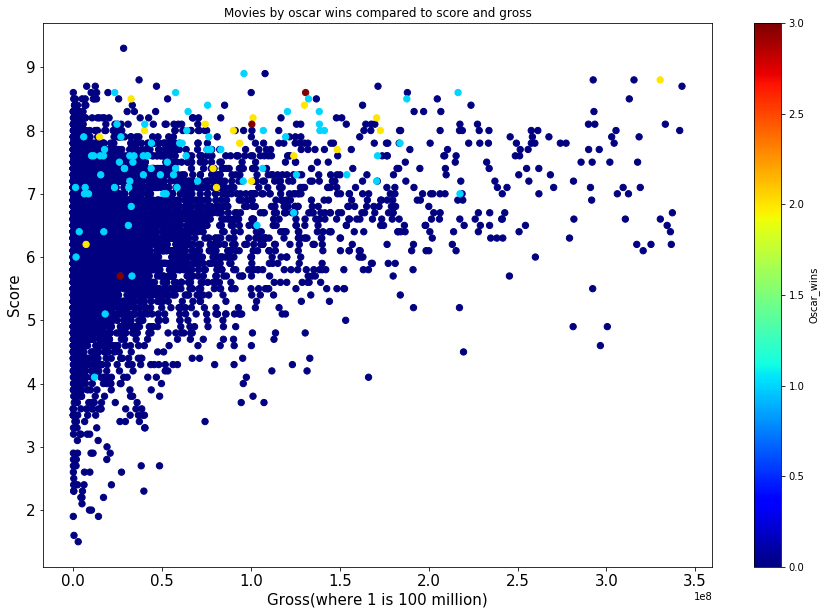

In [159]:
wins.plot.scatter('gross', 'score', c='Oscar_wins',s=40, colormap='jet',sharex=False, figsize=(15,10),title='Movies by oscar wins compared to score and gross',legend=True,fontsize=15,use_index=True,rot=0)
plt.ylabel('Score',size=15)
plt.xlabel('Gross(where 1 is 100 million)',size=15)
#plt.xticks(noms.Oscar_noms, labels, rotation='vertical')

#### need to create a list of fewer values i.e min, max, median ect


To get a clear read of our movies we then decided to look at only the miovies the had won or been nominated for an oscar.

In [143]:
wins2 = oscarMovies[(oscarMovies['gross']<=350000000)&(oscarMovies['Oscar_wins']>=1)]#removes movies that grosses above 350,000,000 millionand movies witout an oscar win.
noms2 = oscarMovies[(oscarMovies['gross']<=350000000)&(oscarMovies['Oscar_noms']>=1)]

Now we can look at the movies that have won oscars and the most imediate trand is that these movie seem to be averaging a score between 7 and 8 which is a very respectable score. This graph also points again to the fact that the number of oscars a movies posesses make very little differnce, the only notiable differnce was between non oscar winning movies.

Text(0.5,0,'Gross(where 1 is 100 million)')

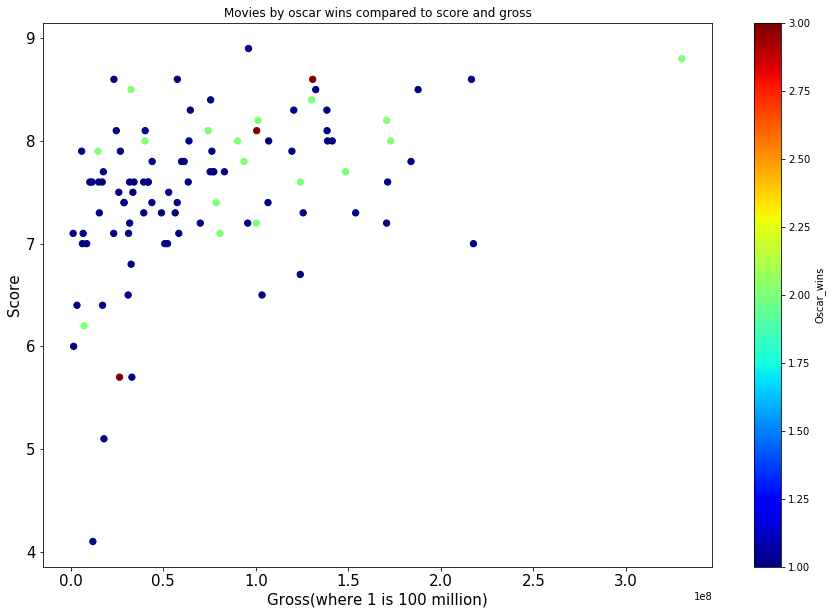

In [160]:
wins2.plot.scatter('gross', 'score', c='Oscar_wins',s=40, colormap='jet',sharex=False, figsize=(15,10),title='Movies by oscar wins compared to score and gross',legend=True,fontsize=15,use_index=True,rot=0)
plt.ylabel('Score',size=15)
plt.xlabel('Gross(where 1 is 100 million)',size=15)

This simply bar show the average score of oscar winning movies by the number of oscars they have and as is clear again from the graph movies with an oscar win turn in a score between 7 and 8.

Text(0.5,0,'Number of Oscar Winners')

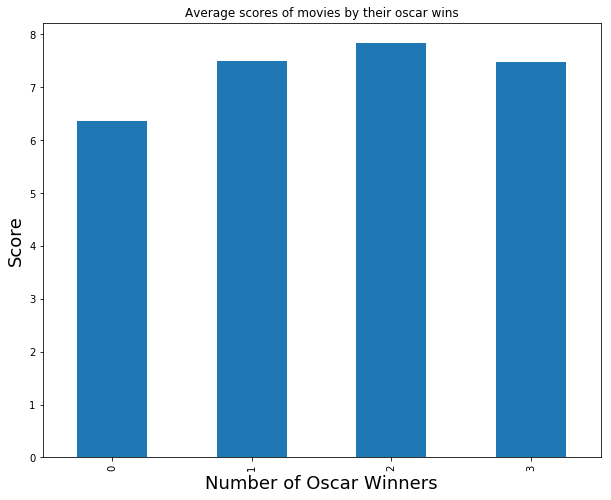

In [165]:
oscarMovies.groupby('Oscar_wins')['score'].mean().plot.bar(title='Average scores of movies by their oscar wins',figsize=(10,8))
plt.ylabel('Score',size=18)
plt.xlabel('Number of Oscar Winners',size=18)

When we look at oscar nominated movie we see trends that are similar to that of oscar winning movies. These films tend to socre highly on average just about 7 which is only slightly lower than oscar winning movies. We can also see that thee is no real trend in the gross that these oscar nominated movies are receving, as we can see movies with different numbers of nominations appearing in no particular order across the hexbin.

Text(0.5,0,'Gross (where 1 is 100 million)')

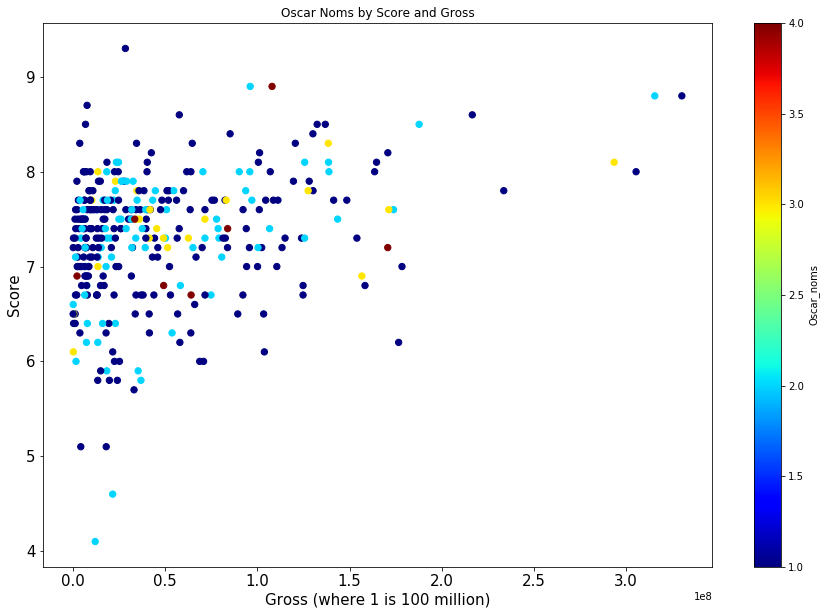

In [148]:
noms2.plot.scatter('gross', 'score', c='Oscar_noms',s=40,title='Oscar Noms by Score and Gross', colormap='jet',sharex=False, figsize=(15,10),legend=True,fontsize=15,use_index=True,rot=0)
plt.ylabel('Score',size=15)
plt.xlabel('Gross (where 1 is 100 million)',size=15)

A quick look at the average score of oscar nominated movies show they score about a point higher than a non oscar nominated movie recieving score just above 7.

Text(0.5,0,'Number of Oscar nominations')

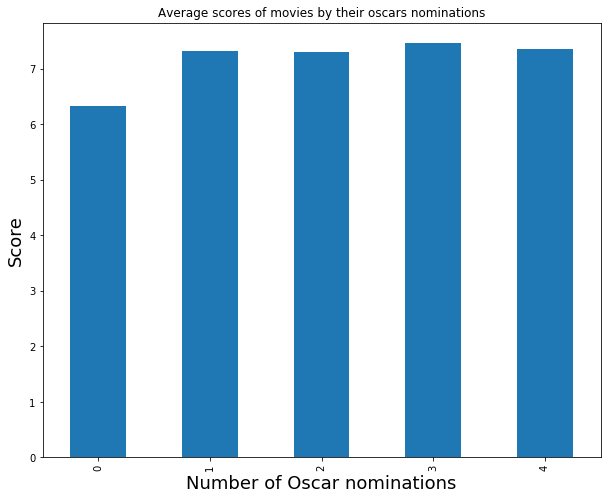

In [164]:
oscarMovies.groupby('Oscar_noms')['score'].mean().plot.bar(title='Average scores of movies by their oscars nominations',figsize=(10,8))
plt.ylabel('Score',size=18)
plt.xlabel('Number of Oscar nominations',size=18)

The highest grossing film in our dataset is Star wars: The Force awakens.

In [153]:
oscarMovies.loc[oscarMovies['gross'].idxmax()]

HarMean                           0.990437
Oscar_wins                               0
budget                            2.45e+08
director                       J.J. Abrams
gross                          9.36662e+08
grossRank                             6820
name          Star Wars: The Force Awakens
score                                  8.1
scoreRank                             6685
star                          Daisy Ridley
year                                  2015
Oscar_noms                               0
Name: 6190, dtype: object

The highest scoringfilm in our dataset is The Shawshank Redemption.

In [154]:
oscarMovies.loc[oscarMovies['score'].idxmax()]

HarMean                        0.80349
Oscar_wins                           0
budget                         2.5e+07
director                Frank Darabont
gross                      2.83415e+07
grossRank                         4577
name          The Shawshank Redemption
score                              9.3
scoreRank                         6820
star                       Tim Robbins
year                              1994
Oscar_noms                           1
Name: 1683, dtype: object

In [155]:
oscarMovies.to_pickle('oscarMovies.pkl')